<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/Scenario_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as pyplt
import matplotlib.dates as mdates
import seaborn as sborn
from wordcloud import WordCloud
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore", category=ValueWarning)

##LOADING RAW DATA

In [2]:
GameAttributes_DF = pd.read_csv('/content/GameAttributes.csv')
GameAttributes_DF

,Game_Name,Provider,Release_Date,Type,RTP,Variance,Hit_Frequency,Max_Win,Min_Bet,Max_Bet,Layout,Betways,Features,Theme,Objects,Genre,Other_Tags,Technology,Last_Update
0,Game King Video Poker,IGT,2019-06-13,Card games,99.16%,Med,NaN,x800.00,0.1,100.0,N-A,NaN,NaN,"Card Game, Card theme, Poker-Game, Video poker",NaN,NaN,"JS, HTML5",NaN,2022-04-30
1,Heads Up Hold' em,Playtech,2019-09-25,Live Casino Games,97.64%,NaN,NaN,0,0.0,0.0,N-A,NaN,NaN,"Card Game, Poker-Game",Table games,"Black, Red, Card, Chip, Live Casino","JS, HTML5",NaN,2019-10-01
2,Premium Blackjack Single Hand,Playtech,2017-08-15,Card games,98.58%,NaN,NaN,x100.00,1.0,1000.0,N-A,NaN,RTP range,Card Game,NaN,"Blackjack, Card, Chip","FLASH, JS, HTML5",NaN,2023-03-18
3,Quantum Roulette,Playtech,2019-08-20,Live Casino Games,97.31%,NaN,NaN,NaN,NaN,NaN,N-A,NaN,NaN,Roulette-Game,Table games,"Live Casino, Roulette","JS, HTML5",NaN,2023-03-07
4,101 Roulette,Playtech,2018-12-13,Roulette Games,96.19%,NaN,NaN,0,0.0,0.0,N-A,NaN,RTP range,Roulette-Game,NaN,"Green, Red","JS, HTML5",NaN,2019-04-26


In [3]:
CountryData_DF = pd.read_csv('/content/CountryData.csv')
CountryData_DF

,Game_Name,Country,Scanned,With_Game,In_Lobby,SlotRank
0,Game King Video Poker,Ireland,307,12,2,1432
1,Game King Video Poker,United Kingdom,577,10,0,5424
2,Game King Video Poker,Sweden,99,5,1,301
3,Game King Video Poker,Canada (Ontario),16,4,1,101
4,Heads Up Hold' em,Norway,465,47,2,684
5,Heads Up Hold' em,Finland,593,43,2,1291
6,Heads Up Hold' em,New Zealand,484,39,0,10938
7,Heads Up Hold' em,Brazil,244,33,0,9941
8,Premium Blackjack Single Hand,Canada,644,68,0,9196
9,Premium Blackjack Single Hand,Finland,593,52,2,1079


In [4]:
SlotRank_DF = pd.read_csv('/content/SlotRank.csv')
SlotRank_DF

,SlotRank_Place,Game_Name,Provider,Average_Position_in_Lobby,Found_in_Casinos
0,1,Game King Video Poker,IGT,137.5,3
1,2,Heads Up Hold' em,Playtech,138.1,2
2,3,Premium Blackjack Single Hand,Playtech,138.5,2
3,4,Quantum Roulette,Playtech,138.8,1
4,5,101 Roulette,Playtech,139.0,3


##DATA PREPROCESSING

##### Dataframe Preprocess

In [5]:
GameAttributes_DF = pd.read_csv('/content/GameAttributes.csv')

# validating the data in date-time format
GameAttributes_DF['Release_Date'] = pd.to_datetime(GameAttributes_DF['Release_Date'])
GameAttributes_DF['Last_Update'] = pd.to_datetime(GameAttributes_DF['Last_Update'])

# dropping columns to cleanup data
GameAttributes_DF.dropna(thresh=3, axis=1, inplace=True)
GameAttributes_DF.drop(['Max_Win', 'Min_Bet', 'Max_Bet', 'Layout'], axis=1, inplace=True)

GameAttributes_DF

,Game_Name,Provider,Release_Date,Type,RTP,Theme,Genre,Other_Tags,Last_Update
0,Game King Video Poker,IGT,2019-06-13,Card games,99.16%,"Card Game, Card theme, Poker-Game, Video poker",NaN,"JS, HTML5",2022-04-30
1,Heads Up Hold' em,Playtech,2019-09-25,Live Casino Games,97.64%,"Card Game, Poker-Game","Black, Red, Card, Chip, Live Casino","JS, HTML5",2019-10-01
2,Premium Blackjack Single Hand,Playtech,2017-08-15,Card games,98.58%,Card Game,"Blackjack, Card, Chip","FLASH, JS, HTML5",2023-03-18
3,Quantum Roulette,Playtech,2019-08-20,Live Casino Games,97.31%,Roulette-Game,"Live Casino, Roulette","JS, HTML5",2023-03-07
4,101 Roulette,Playtech,2018-12-13,Roulette Games,96.19%,Roulette-Game,"Green, Red","JS, HTML5",2019-04-26


In [6]:
print('Total number of features in the Game Attributes are: ', GameAttributes_DF.shape[1])

Total number of features in the Game Attributes are:  9


##### Combined Dataframe

In [7]:
add = pd.merge(CountryData_DF, SlotRank_DF, on='Game_Name')
Combined_DF = pd.merge(add, GameAttributes_DF, on='Game_Name')
Combined_DF['RTP'] = Combined_DF['RTP'].str.rstrip('%').astype('float') / 100.0

### Initial Vizualization

In [8]:
Combined_DF

,Game_Name,Country,Scanned,With_Game,In_Lobby,SlotRank,SlotRank_Place,Provider_x,Average_Position_in_Lobby,Found_in_Casinos,Provider_y,Release_Date,Type,RTP,Theme,Genre,Other_Tags,Last_Update
0,Game King Video Poker,Ireland,307,12,2,1432,1,IGT,137.5,3,IGT,2019-06-13,Card games,0.9916,"Card Game, Card theme, Poker-Game, Video poker",NaN,"JS, HTML5",2022-04-30
1,Game King Video Poker,United Kingdom,577,10,0,5424,1,IGT,137.5,3,IGT,2019-06-13,Card games,0.9916,"Card Game, Card theme, Poker-Game, Video poker",NaN,"JS, HTML5",2022-04-30
2,Game King Video Poker,Sweden,99,5,1,301,1,IGT,137.5,3,IGT,2019-06-13,Card games,0.9916,"Card Game, Card theme, Poker-Game, Video poker",NaN,"JS, HTML5",2022-04-30
3,Game King Video Poker,Canada (Ontario),16,4,1,101,1,IGT,137.5,3,IGT,2019-06-13,Card games,0.9916,"Card Game, Card theme, Poker-Game, Video poker",NaN,"JS, HTML5",2022-04-30
4,Heads Up Hold' em,Norway,465,47,2,684,2,Playtech,138.1,2,Playtech,2019-09-25,Live Casino Games,0.9764,"Card Game, Poker-Game","Black, Red, Card, Chip, Live Casino","JS, HTML5",2019-10-01
5,Heads Up Hold' em,Finland,593,43,2,1291,2,Playtech,138.1,2,Playtech,2019-09-25,Live Casino Games,0.9764,"Card Game, Poker-Game","Black, Red, Card, Chip, Live Casino","JS, HTML5",2019-10-01
6,Heads Up Hold' em,New Zealand,484,39,0,10938,2,Playtech,138.1,2,Playtech,2019-09-25,Live Casino Games,0.9764,"Card Game, Poker-Game","Black, Red, Card, Chip, Live Casino","JS, HTML5",2019-10-01
7,Heads Up Hold' em,Brazil,244,33,0,9941,2,Playtech,138.1,2,Playtech,2019-09-25,Live Casino Games,0.9764,"Card Game, Poker-Game","Black, Red, Card, Chip, Live Casino","JS, HTML5",2019-10-01
8,Premium Blackjack Single Hand,Canada,644,68,0,9196,3,Playtech,138.5,2,Playtech,2017-08-15,Card games,0.9858,Card Game,"Blackjack, Card, Chip","FLASH, JS, HTML5",2023-03-18
9,Premium Blackjack Single Hand,Finland,593,52,2,1079,3,Playtech,138.5,2,Playtech,2017-08-15,Card games,0.9858,Card Game,"Blackjack, Card, Chip","FLASH, JS, HTML5",2023-03-18


In [9]:
Combined_DF.describe()

,Scanned,With_Game,In_Lobby,SlotRank,SlotRank_Place,Average_Position_in_Lobby,Found_in_Casinos,RTP
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,472.75000,45.55000,1.150000,5785.200000,3.000000,138.380000,2.200000,0.977760
std,177.16358,35.17247,2.033276,5391.043016,1.450953,0.548299,0.767772,0.010576
min,16.00000,4.00000,0.000000,49.000000,1.000000,137.500000,1.000000,0.961900
25%,465.00000,17.00000,0.000000,1029.250000,2.000000,138.100000,2.000000,0.973100
50%,484.00000,41.00000,0.500000,3841.000000,3.000000,138.500000,2.000000,0.976400
75%,593.00000,56.00000,2.000000,10377.000000,4.000000,138.800000,3.000000,0.985800
max,644.00000,122.00000,9.000000,14850.000000,5.000000,139.000000,3.000000,0.991600


In [10]:
print('GameAttributes_DF columns are ', GameAttributes_DF.columns)
print('\n\nCountryData_DF columns are ', CountryData_DF.columns)
print('\n\nSlotRank_DF columns are ', SlotRank_DF.columns)
print('\n\nCombined_DF columns are ', Combined_DF.columns)

GameAttributes_DF columns are  Index(['Game_Name', 'Provider', 'Release_Date', 'Type', 'RTP', 'Theme',
       'Genre', 'Other_Tags', 'Last_Update'],
      dtype='object')


CountryData_DF columns are  Index(['Game_Name', 'Country', 'Scanned', 'With_Game', 'In_Lobby', 'SlotRank'], dtype='object')


SlotRank_DF columns are  Index(['SlotRank_Place', 'Game_Name', 'Provider', 'Average_Position_in_Lobby',
       'Found_in_Casinos'],
      dtype='object')


Combined_DF columns are  Index(['Game_Name', 'Country', 'Scanned', 'With_Game', 'In_Lobby', 'SlotRank',
       'SlotRank_Place', 'Provider_x', 'Average_Position_in_Lobby',
       'Found_in_Casinos', 'Provider_y', 'Release_Date', 'Type', 'RTP',
       'Theme', 'Genre', 'Other_Tags', 'Last_Update'],
      dtype='object')


## DATA VIZUALIZATION

### 0. Features Correlation Matrix

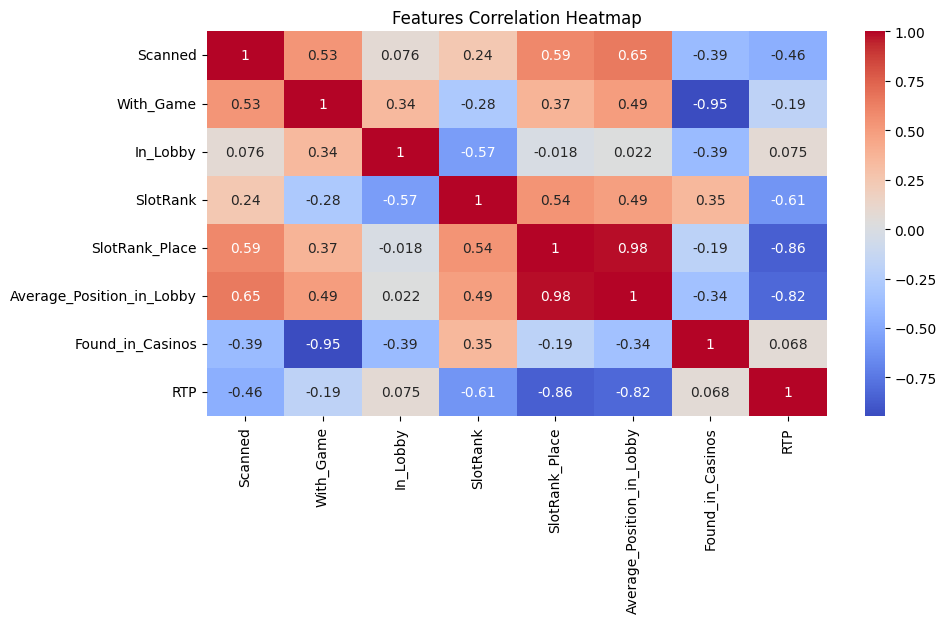

In [11]:
# Plotting a 10x5 chart
pyplt.figure(figsize=(10, 5))

# Showing Correlation Between Features of the complete dataset
sborn.heatmap(Combined_DF.corr(numeric_only=True), cmap='coolwarm', annot=True)
pyplt.title("Features Correlation Heatmap")
pyplt.show()

### 1. Pie Chart -- MarketShare of each Brand on the Leaderboard

#### Exhibit A -- MarketShare for Game Providers

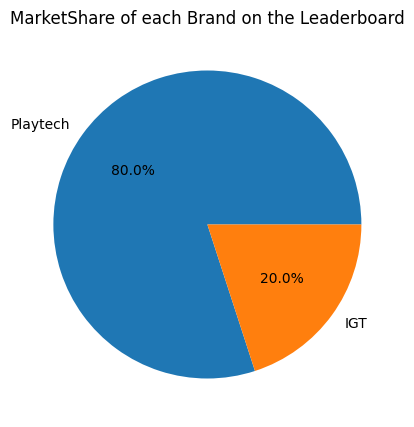

In [12]:
# occurence of brand in the leaderboard
occurence = GameAttributes_DF['Provider'].value_counts()

# Plotting a chart to show marketshare
pyplt.figure(figsize=(5, 5))
pyplt.pie(occurence, labels=occurence.index, autopct='%1.1f%%')
pyplt.title('MarketShare of each Brand on the Leaderboard')
pyplt.show()

#### Exhibit B -- MarketShare for Game Type

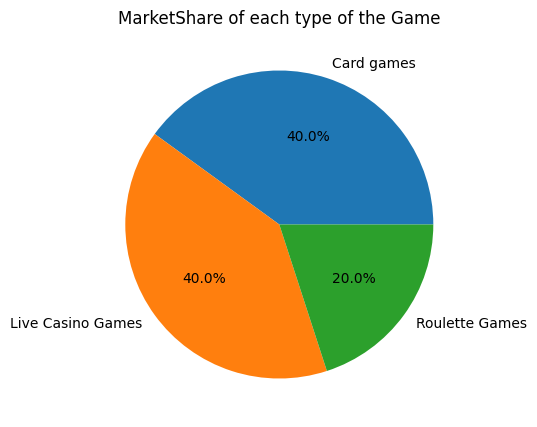

In [18]:
# occurence of brand in the leaderboard
occurence = GameAttributes_DF['Type'].value_counts()

# Plotting a chart to show marketshare
pyplt.figure(figsize=(5, 5))
pyplt.pie(occurence, labels=occurence.index, autopct='%1.1f%%')
pyplt.title('MarketShare of each type of the Game')
pyplt.show()

### 2. Heatmap (Vizualize the intensity of Popularity)

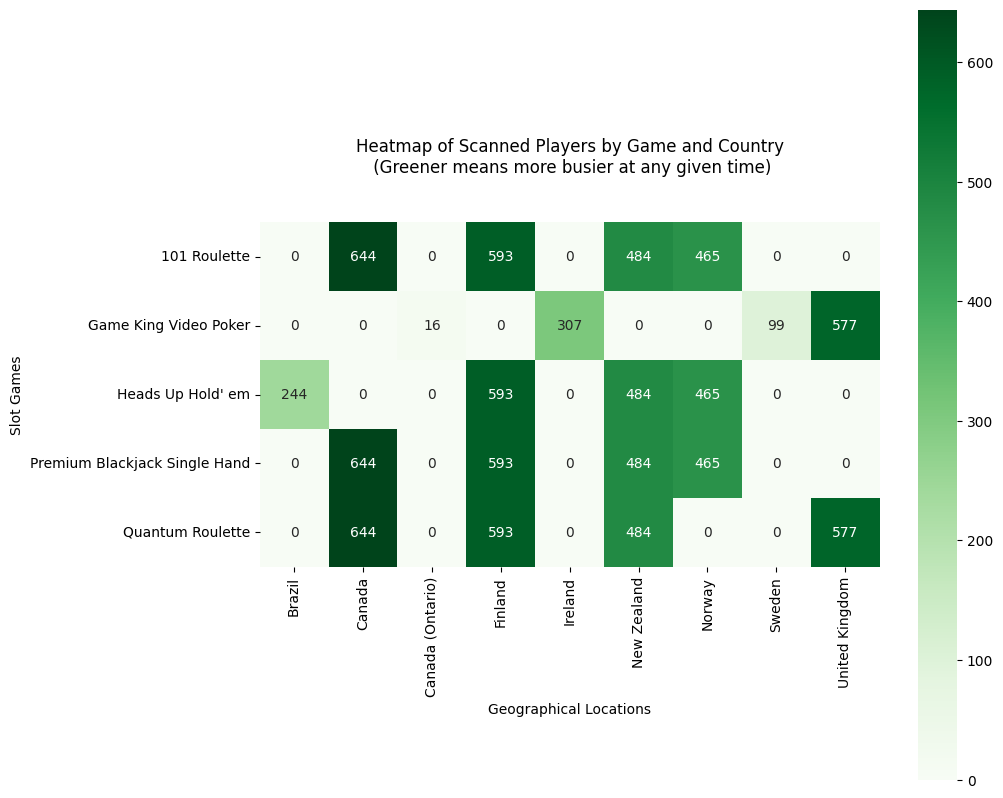

In [13]:
# Charting the layout
pyplt.figure(figsize=(10, 10))

# Pivoting the Column for the heatmap
the_pivot = pd.pivot_table(Combined_DF, index='Game_Name', values='Scanned', columns='Country', fill_value=0)

# Plotting a heatmap
sborn.heatmap(the_pivot, annot=True, cmap="Greens", cbar=True, square=True, fmt="d")

pyplt.title("Heatmap of Scanned Players by Game and Country\n (Greener means more busier at any given time)\n\n")
pyplt.xlabel("Geographical Locations")
pyplt.ylabel("Slot Games")
pyplt.show()

### 3. Box Plot (Range of variance in Return-To-Player Metrics)

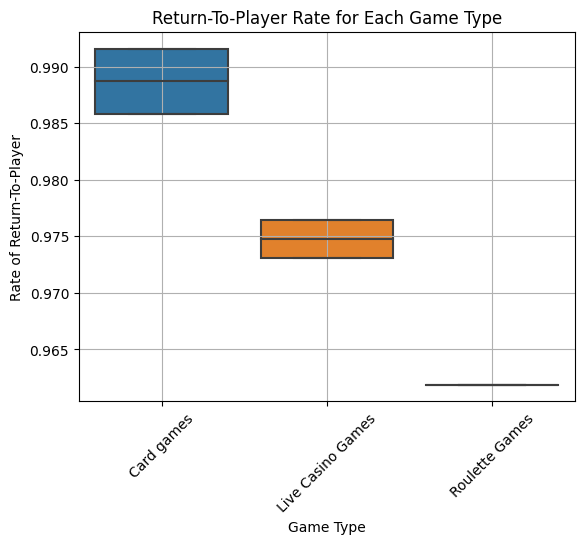

In [14]:
# Defining a BoxPlot
sborn.boxplot(data=Combined_DF, x='Type', y='RTP')

# Adding Chart's Description for interpretation
pyplt.title('Return-To-Player Rate for Each Game Type')
pyplt.ylabel('Rate of Return-To-Player')
pyplt.xlabel('Game Type')

pyplt.xticks(rotation=45)
pyplt.grid(True)
pyplt.show()

### 4. Word Cloud

#### Exhibit A -- For Game Themes

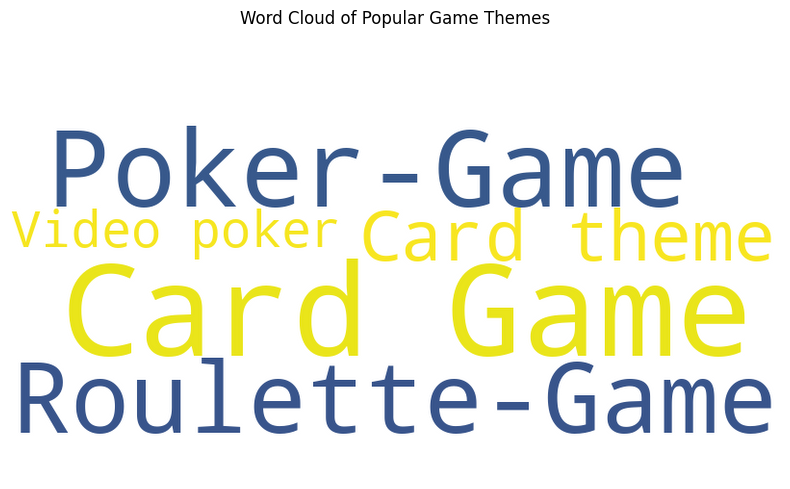

In [15]:
themes_for_plot = (GameAttributes_DF['Theme'].str.split(', ').explode()).value_counts()

# Plotting the Cloud for Themes
wordcloud_plot = WordCloud(height=400, width=800, background_color='white').generate_from_frequencies(themes_for_plot)
pyplt.figure(figsize=(10, 5))
pyplt.imshow(wordcloud_plot, interpolation='lanczos')
pyplt.axis('off')
pyplt.title('Word Cloud of Popular Game Themes\n\n\n')
pyplt.show()


#### Exhibit B -- For Game Genres

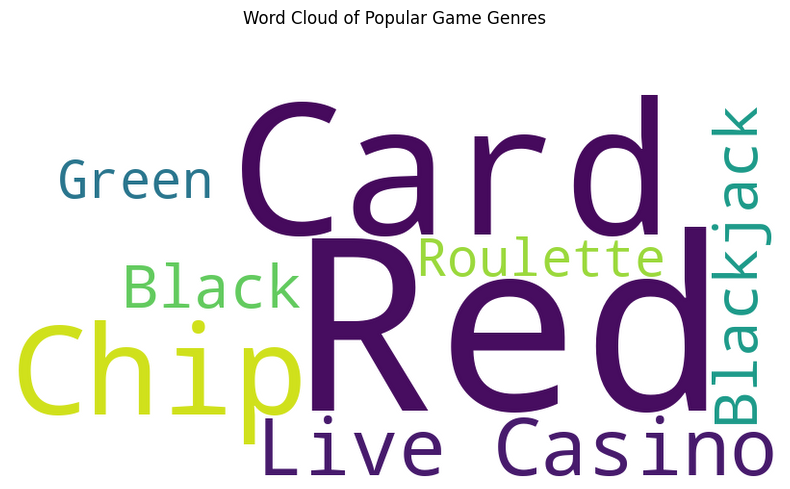

In [16]:
themes_for_plot = (GameAttributes_DF['Genre'].str.split(', ').explode()).value_counts()

# Plotting the Cloud for Genres
wordcloud_plot = WordCloud(height=400, width=800, background_color='white').generate_from_frequencies(themes_for_plot)
pyplt.figure(figsize=(10, 5))
pyplt.imshow(wordcloud_plot, interpolation='lanczos')
pyplt.axis('off')
pyplt.title('Word Cloud of Popular Game Genres\n\n\n')
pyplt.show()